In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf            # deep learning library. Tensors are just multi-dimensional arrays
tf.__version__

'2.5.0'

In [3]:
mnist = tf.keras.datasets.mnist    # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train), (x_test,y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model


Epoch 1/3
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2568 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - accuracy: 0.9762


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9745
0.08717726171016693
0.9745000004768372


In [6]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

INFO:tensorflow:Assets written to: epic_num_reader.model\assets
[[7.4555440e-10 3.4426925e-08 9.8652015e-07 ... 9.9998510e-01
  7.4335529e-09 6.8196329e-08]
 [1.4259002e-10 1.1145523e-05 9.9998629e-01 ... 2.3776330e-08
  3.0735539e-08 6.9624363e-13]
 [5.4204754e-08 9.9907935e-01 4.0775183e-05 ... 4.6349448e-04
  5.7905818e-05 6.0303950e-07]
 ...
 [9.7241193e-10 4.8088810e-07 5.3173267e-08 ... 9.4633950e-05
  6.1033206e-06 1.7694152e-04]
 [9.3294497e-05 1.5612142e-07 6.8196499e-07 ... 5.7867652e-08
  7.1315786e-05 7.2777859e-09]
 [1.0686457e-05 1.5425810e-08 2.6539436e-07 ... 5.3789478e-10
  1.1510820e-07 8.2731422e-09]]


In [7]:
import numpy as np 

print(np.argmax(predictions[0]))           # Our Prediction 

7


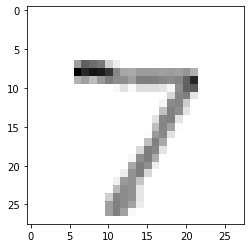

In [10]:
plt.imshow(x_test[0],cmap=plt.cm.binary)    # Output
plt.show()

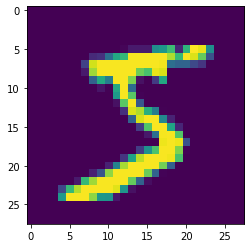

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0] )
plt.show()
